
## Exercicio boston data.
- Pode ser feito por até 3 alunos e não mais que isso.

- Atividades que devem ser feitas:
    - Analisar se existem missing values e tratar de acordo com o bom senso.
    - Analisar se existem outlier e tratar.
    - Verificar a necessidade de fazer normalização ou padronização dos dados.
    - Realizar a EDA completa desta base de dados.

Obs.: Professora estou deixando todos os comentarios em inglês pois estou treinando codar e comentar sempre em ingles por conta do mercado de trabalho. Se isto for algum problema, me avise que refaco uma versao totalmente em portugues.

At the base, we have this header informing you about your data at the beginning.


 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.
```
 Variables in order:
 CRIM     per capita crime rate by town.
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town.
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
 NOX      nitric oxides concentration (parts per 10 million).
 RM       average number of rooms per dwelling.
 AGE      proportion of owner-occupied units built prior to 1940.
 DIS      weighted distances to five Boston employment centres.
 RAD      index of accessibility to radial highways.
 TAX      full value property tax rate per 10.000.
 PTRATIO  pupil-teacher ratio by town.
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
 LSTAT    % lower status of the population.
 MEDV     Median value of owner-occupied homes in $1000's.
 ```

In [ ]:
# Imports that I will use for the EDA decor.
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
import numpy as np

# First, I will read the Boston data.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
# In the `read_csv` function I will use the `skiprows` argument with the value 22, to skip the previously mentioned header.
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22,header=None) 


Here it is necessary to perform a little processing on the data to visualize it clearly. Because when we read with the read_csv function in the current way, only 11 columns are being identified. Columns numbered 12, 13, 14 are being counted as values from columns 1, 2 and 3 of supposed incorrect new lines and this way we have a wrong view of the base. One way I found to fix it was after separating the correct columns from 1 to 11, taking columns 12, 13 and 14 that were transformed and new lines here and concatenating them. For this I use the `hstack` function and the values.
To see the `raw_df` value before treatment. Just print the raw_df variable.

Here I take the opportunity to put the name in the columns, following the header.

In [29]:
first_treated_df = pd.DataFrame(
    np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]]),
    columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

# And this way we can already visualize the preview of the database
print(first_treated_df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

# Some general characteristic

In [51]:
print(first_treated_df.shape) # give us the number of "(rows, columns)"

(506, 14)


### Output head of boston dataframe for instance inspection.

In [30]:
first_treated_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Display a description of the boston dataset as summary.

In [31]:
first_treated_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Below we will create the histogram of all columns to better visualize and understand the data.


### CRIM histogram

<Axes: >

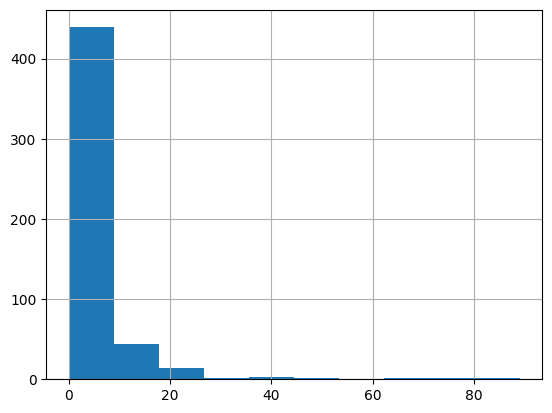

In [34]:
first_treated_df['CRIM'].hist()

### ZN histogram

<Axes: >

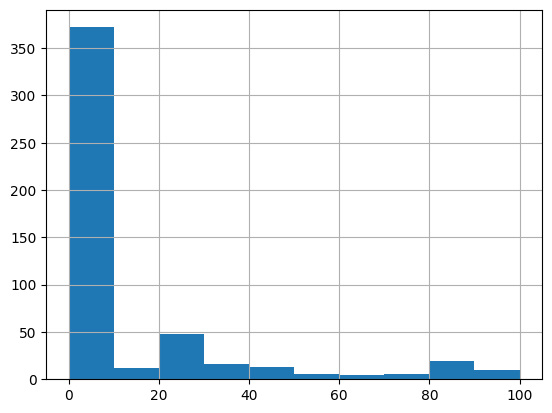

In [35]:
first_treated_df['ZN'].hist()

### INDUS histogram

<Axes: >

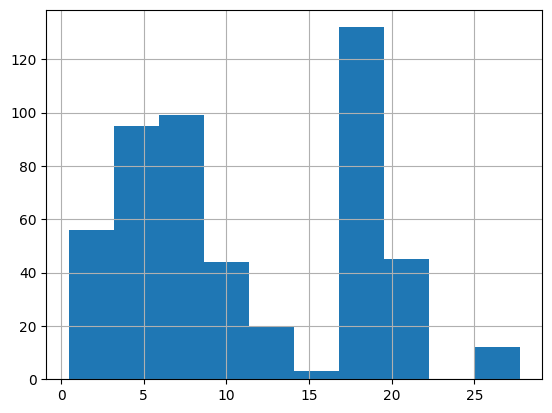

In [36]:
first_treated_df['INDUS'].hist()

### CHAS histogram

<Axes: >

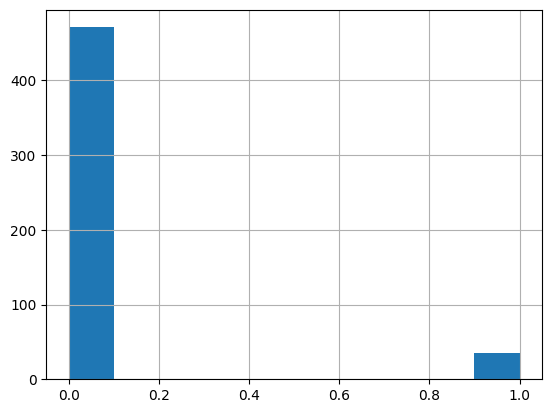

In [37]:
first_treated_df['CHAS'].hist()

### NOX histogram

<Axes: >

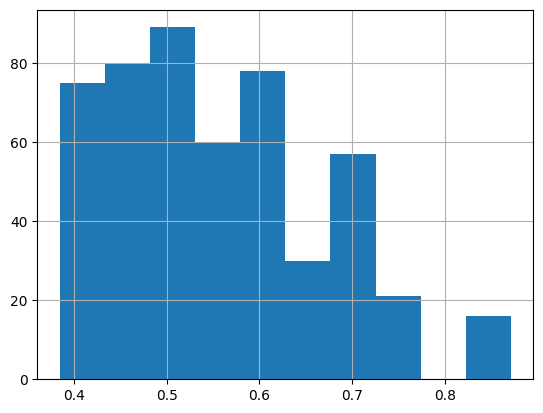

In [39]:
first_treated_df['NOX'].hist()

### RM histogram

<Axes: >

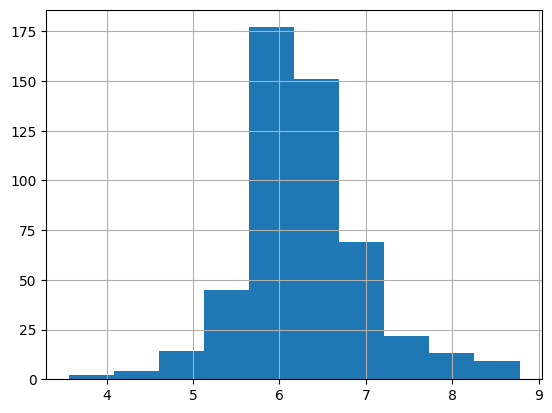

In [40]:
first_treated_df['RM'].hist()

### AGE histogram

<Axes: >

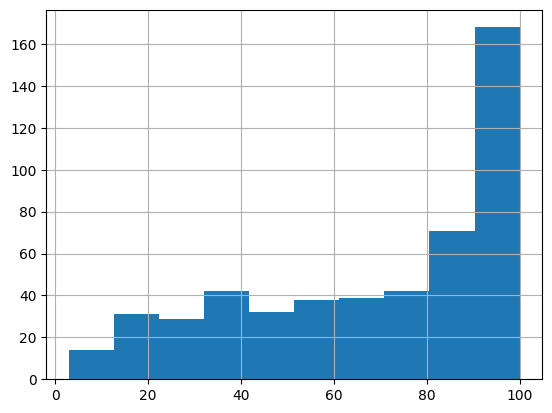

In [42]:
first_treated_df['AGE'].hist()

### DIS histogram

<Axes: >

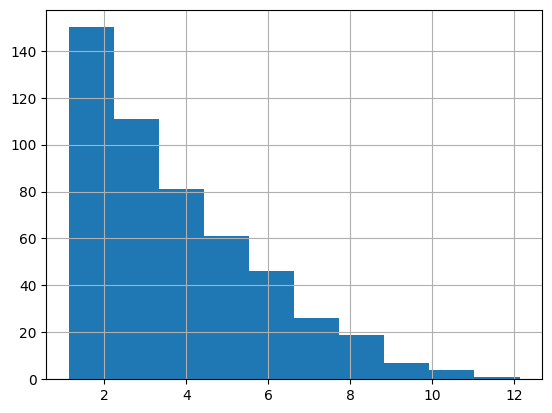

In [43]:
first_treated_df['DIS'].hist()

### RAD histogram

<Axes: >

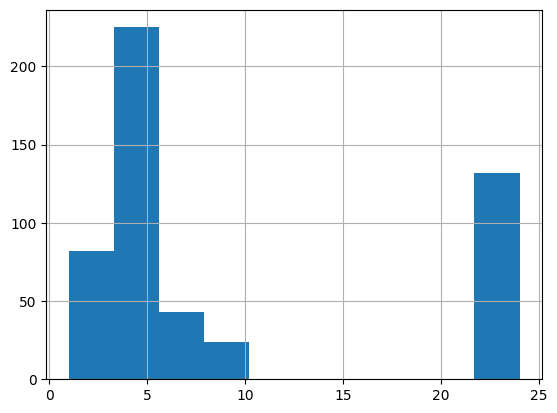

In [44]:
first_treated_df['RAD'].hist()

### TAX histogram

<Axes: >

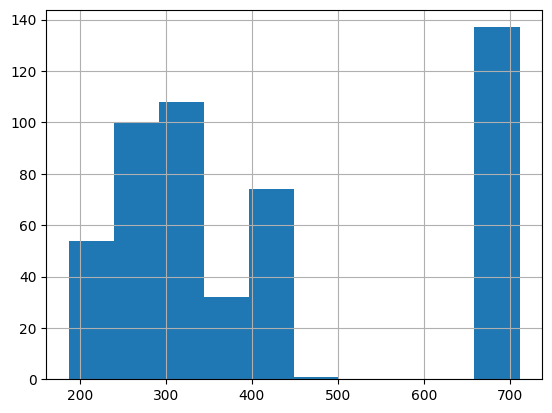

In [45]:
first_treated_df['TAX'].hist()

### PTRATIO histogram 

<Axes: >

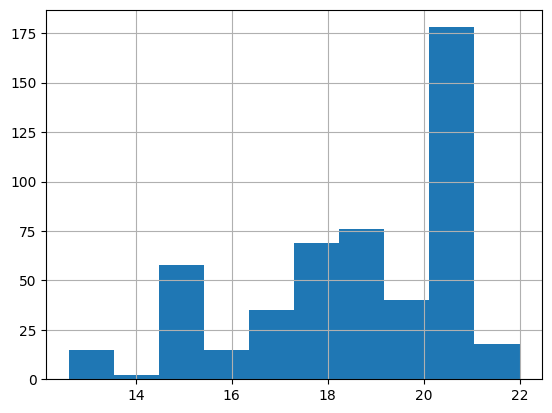

In [48]:
first_treated_df['PTRATIO'].hist()

### B histogram 

<Axes: >

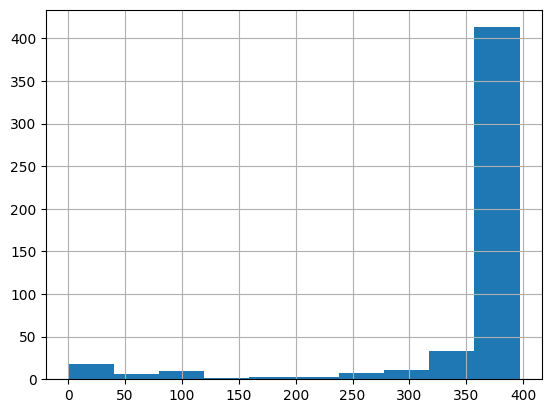

In [47]:
first_treated_df['B'].hist()

### LSTAT histogram 

<Axes: >

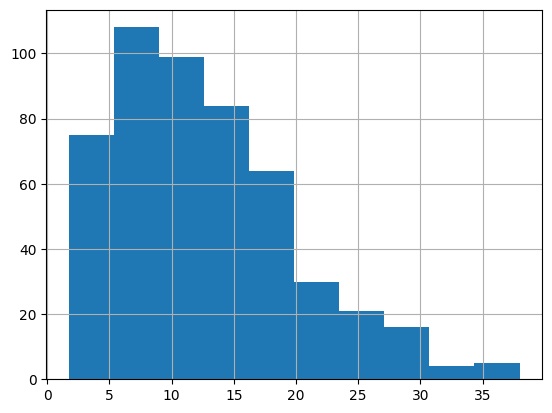

In [49]:
first_treated_df['LSTAT'].hist()

### MEDV histogram 

<Axes: >

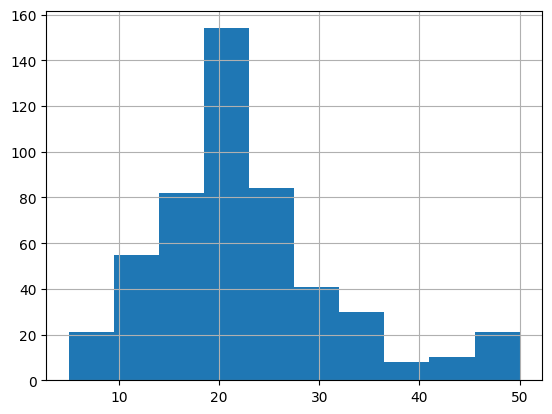

In [50]:
first_treated_df['MEDV'].hist()